# Predicting Forest Cover Types
## Mod 5 - Kaggle Competition - Machine Learning

![alt text](forest_img.png "title")

<span style="color:green">by *Valentina Fontiveros*</span>

Next: 
    1) fuse soil categories into stony / drainage
    2) Hydrology (distance to water) / water table
    3) Outliers deal

![](park_photo.png)

## Introduction

This dataset comes from a study conducted in four wilderness areas within the Roosevelt National Forest of northern Colorado. These areas represent forests with very little human disturbances – the existing forest cover types there are more a result of ecological processes rather than forest management practices. The data is in raw form and contains categorical data such as wilderness areas and soil type.

Being able to predict which fauna grows optimally under various environmental conditions would aid in conservation and reforestation efforts.

## Domain Considerations:

Since the training dataset describes various environmental factors associated with each 
cover type, we should consider how to properly process the data to fit with our biological
knowledge.

There are various abiotic factors affecting plant species distribution and growth:

- elevation / temperature      : plant species are very sensitive to elevation / temperature differences 
- water / drainage             : water availability is related to slope, soil composition, and surface water location. 
- sunlight / shade /           : sunlight availability is related to hillshade / aspect
- nutrient availability        : soils have varying levels of organic and inorganic nutrients / magnesium / iron helps



In [1]:
# basic python libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'Paired'

import seaborn as sns
sns.palplot(sns.color_palette("Paired"))
%matplotlib inline

### Forest Habitats by Target

- 1 - Spruce/Fir
    > Some 5% of Colorado’s landscape is occupied by this forest type, which is one of the few Colorado forest types that is not fire-adapted. This ecological zone occurs at the highest elevations at all exposures and
topographic positions from 5,200 to over 6,000 feet in elevation. In general, the zone occurs on exposed
landforms that are convex in shape (Simon 2012). Moisture content is not limiting and is present both
from fog deposition and ambient rainfall. Soils vary from shallow rocky substrates where Fraser fir
dominates to deeper mineral soils with a well-developed organic layer in mixed spruce-fir forest. Low
temperatures, high winds, frost, and ice are all important natural disturbance events influencing this
zone. Source: https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/stelprdb5436769.pdf
- 2 - Lodgepole Pine
    > Lodgepole pine is a highly adaptable tree that can grow in all sorts of environments, from water-logged bogs to dry sandy soils.
Lodgepole pine is one of the first trees to invade after a wildfire. Its cones are protected by a seal of pitch that requires fire or heat to release the seeds. This allows seeds to stay on the tree or on the ground for many years until disturbance provides suitable growing conditions. Lodgepole pine can occur as the only tree in dense, very slow-growing groups of trees (so-called "dog-hair" stands). Source: https://www.for.gov.bc.ca/hfd/library/documents/treebook/lodgepolepine.htm
- 3 - Ponderosa Pine 
    > The USDA hardiness zones for ponderosa pine range
from 3 to 7. It grows on a variety of soils from
shallow to deep, and from gravelly sands to sandy
clay loam. It is found growing on bare rock with its
roots in the cracks and crevices. It has a low tolerance
to alkalinity, preferring soils with a pH of 6.0 to 7.0.
It grows best in zones with 30 to 60 cm average
annual precipitation on well-drained soils. Once
established it also survives hot and dry conditions,
exhibiting medium to good drought tolerance. Fifty
percent shade reduces the growth rate significantly.
It withstands very cold winters.
Ponderosa pine is a climax species at the lower
elevations of the coniferous forest and a midsuccessional species at higher elevations where more
competitive conifers are capable of growing. It
generally grows at elevations between sea level and
3,000 m. The populations at higher elevations
usually occur within the southern part of its range . Ponderosa pine is resistant to fire due to its thick
bark. Source: https://plants.usda.gov/plantguide/pdf/pg_pipo.pdf


- 4 - Cottonwood/Willow
    > Cottonwood makes its best growth on moist, welldrained, fine sandy loams or silt loams. Coarse sands
and heavy clay soils are not satisfactory. It has been
found to be relatively tolerant of drier sites as shown
by survival and growth of trees planted on strip mine
spoil. Cottonwood is resistant to flood damage and
usually tolerates a soil pH range of 4.5 to 8.0. Source: https://plants.usda.gov/factsheet/pdf/fs_pode3.pdf

    > Black willow is adapted wherever ample soil moisture is found. Black willow is very susceptible to fire. Source: https://plants.usda.gov/factsheet/pdf/fs_sani.pdf

- 5 - Aspen
    > Quaking aspen occurs in a wide variety of habitats
(including soil type and moisture conditions) and at a
great range of elevation, matching its extensive
geographic range. It characteristically forms pure
stands or mixed stands with bigtooth aspen, but it
occurs with scrub oaks and sagebrush at lower
elevations and as a prostrate form above timberline
and exists as a dominant species in many
communities at mid elevations. It is a shadeintolerant, disturbed site species and is quickly
replaced in succession by more tolerant species. Source: https://plants.usda.gov/plantguide/pdf/cs_potr5.pdf

    > Aspen grows in a wide range of environmental conditions, from moist streamsides, to dry ridges, on talus slopes, in shallow to deep soils of various origins, and is tolerant of wide variations in climate. It is found in all mountain vegetational zones, from the basal plains of the mountains to the alpine. As a result, aspen communities are found associated with a diverse range of vegetation, from semi-arid shrublands to wet, spruce-fir forest. Source: https://www.fs.fed.us/wildflowers/beauty/aspen/ecology.shtml
    
- 6 - Douglas-fir
    > Douglas-fir needs excellent drainage. In
the higher elevations of the West that receive snow
and in the lower foothills that have moderately cold
winters and hot summers, Douglas-fir requires
moderate summer watering, generally 1-4 times per
month depending upon the absorption rate and water
retention capacity of the soil. It does best in full or
part-shade. Source: https://plants.usda.gov/plantguide/pdf/cs_psme.pdf
- 7 - Krummholz
    > s a type of stunted, deformed vegetation encountered in subarctic and subalpine tree line landscapes, shaped by continual exposure to fierce, freezing winds. Under these conditions, trees can only survive where they are sheltered by rock formations or snow cover. As the lower portion of these trees continues to grow, the coverage becomes extremely dense near the ground. Common trees showing krumholtz formation include European spruce, mountain pine, balsam fir, red spruce, black spruce, subalpine fir, subalpine larch, Engelmann spruce, whitebark pine, limber pine, Bristlecone pine, and lodgepole pine. Instances of the krummholz form of black spruce, Picea mariana, are found in the northern Canadian boreal forests.[5] Krummholz-form black spruce and balsam fir are abundant in the alpine transition zone of the White Mountains of New Hampshire.Subalpine fir is the most common associate of spruce in krummholz vegetation.  Source: https://en.wikipedia.org/wiki/Krummholz

## Read Data

In [2]:
train = pd.read_csv('train.csv', dtype = 'float')
test = pd.read_csv('test.csv', dtype = 'float')

# Set Record Id As Index
train.Id.astype('int',inplace=True)
test.Id.astype('int',inplace=True)
train.set_index('Id',inplace=True)  
test.set_index('Id',inplace=True)

# suppress warnings 
import warnings
warnings.filterwarnings('ignore')
print('Data is loaded, indexed by ID, and transformed to floating number.')

Data is loaded, indexed by ID, and transformed to floating number.


In [3]:
# create a dictionary to refer to cover types
Cover_Type = {1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas Fir', 7: 'Krummholz'}
Cover_Type_lst = ['Fir','Lodgepole','Ponderosa','Willow','Aspen','Douglas','Krummholz']


In [4]:
print('Features included in training dataset: ',len(train.columns))
print('')
print(train.columns)
print('')
print('Are features the same order/wording/length in the test set?: ', list(train.columns[0:-1]) == list(test.columns))

Features included in training dataset:  55

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil

## Summary Statistics

Findings:
- There are significant difference in Mean and STD between features in the test set and training sets. 
- As a result, we should expect a significant variation in the target variable distributions.

In [5]:
print('Summary statistics for training dataset continuous variables.')
train_stats = train[train.columns[0:10]].describe(); train_stats

Summary statistics for training dataset continuous variables.


Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   15120.000000                        15120.000000  
mean      135.091997                         1511.147288  
std        45.895189                         1099.936493  
min         0.000000                            0.000000  
25%       106.000000                          730.000000  
50%       138.000000                         1256.000000  
75%       167.000000                         1988.250000  
max       248.000000                         6993.000000

In [6]:
print('Summary statistics for test dataset continuous variables')
test_stats = test[test.columns[0:10]].describe()

Summary statistics for test dataset continuous variables


In [7]:
print('Calculate Difference in Stats (Test - Train)')
diff_stats = test_stats-train_stats

Calculate Difference in Stats (Test - Train)


Positive values represent higher test set values.
Negative values represent lower test set values
Values near zero show negligible differences between test and train set.



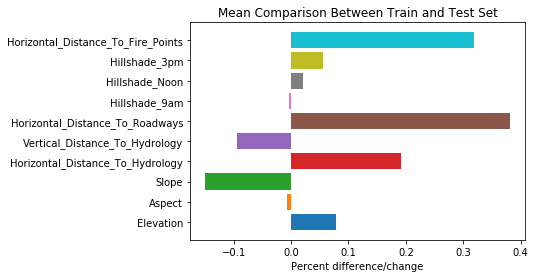

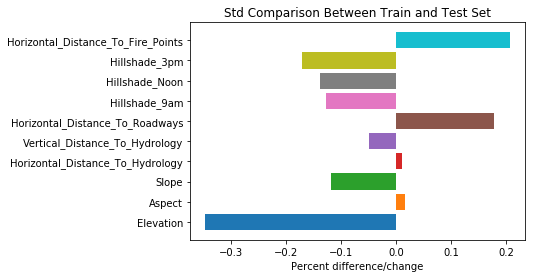

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Positive values represent higher test set values.')
print('Negative values represent lower test set values')
print('Values near zero show negligible differences between test and train set.')

for i in ['mean','std']:
    print('')
    for c in diff_stats:
        plt.barh(c,diff_stats[c][i]/train_stats[c][i])
        plt.title(i.capitalize() + ' Comparison Between Train and Test Set')
        plt.xlabel('Percent difference/change')
    plt.show()

## Data QC

### Missing Values

In [9]:
print('Any missing values in training data? ',train.isna().any().any())
print('Any missing values in test data? ', test.isna().any().any())

Any missing values in training data?  False
Any missing values in test data?  False


### Overall Feature Correlations

Strongest correlations:
- Hillshade 9 am and Hillshade 3 pm (negative)
- Hillshade Noon and Slope          (negative)
- Hillshade 3 pm and Aspect         (positive)
- Hillshade 9 am and Aspect         (negative)
- Vertical dist to Hydro/ HDTH      (positive)
- Elevation, H dist to Roadways     (positive)
- HDT Roadway and HDT Firepoints    (positive)

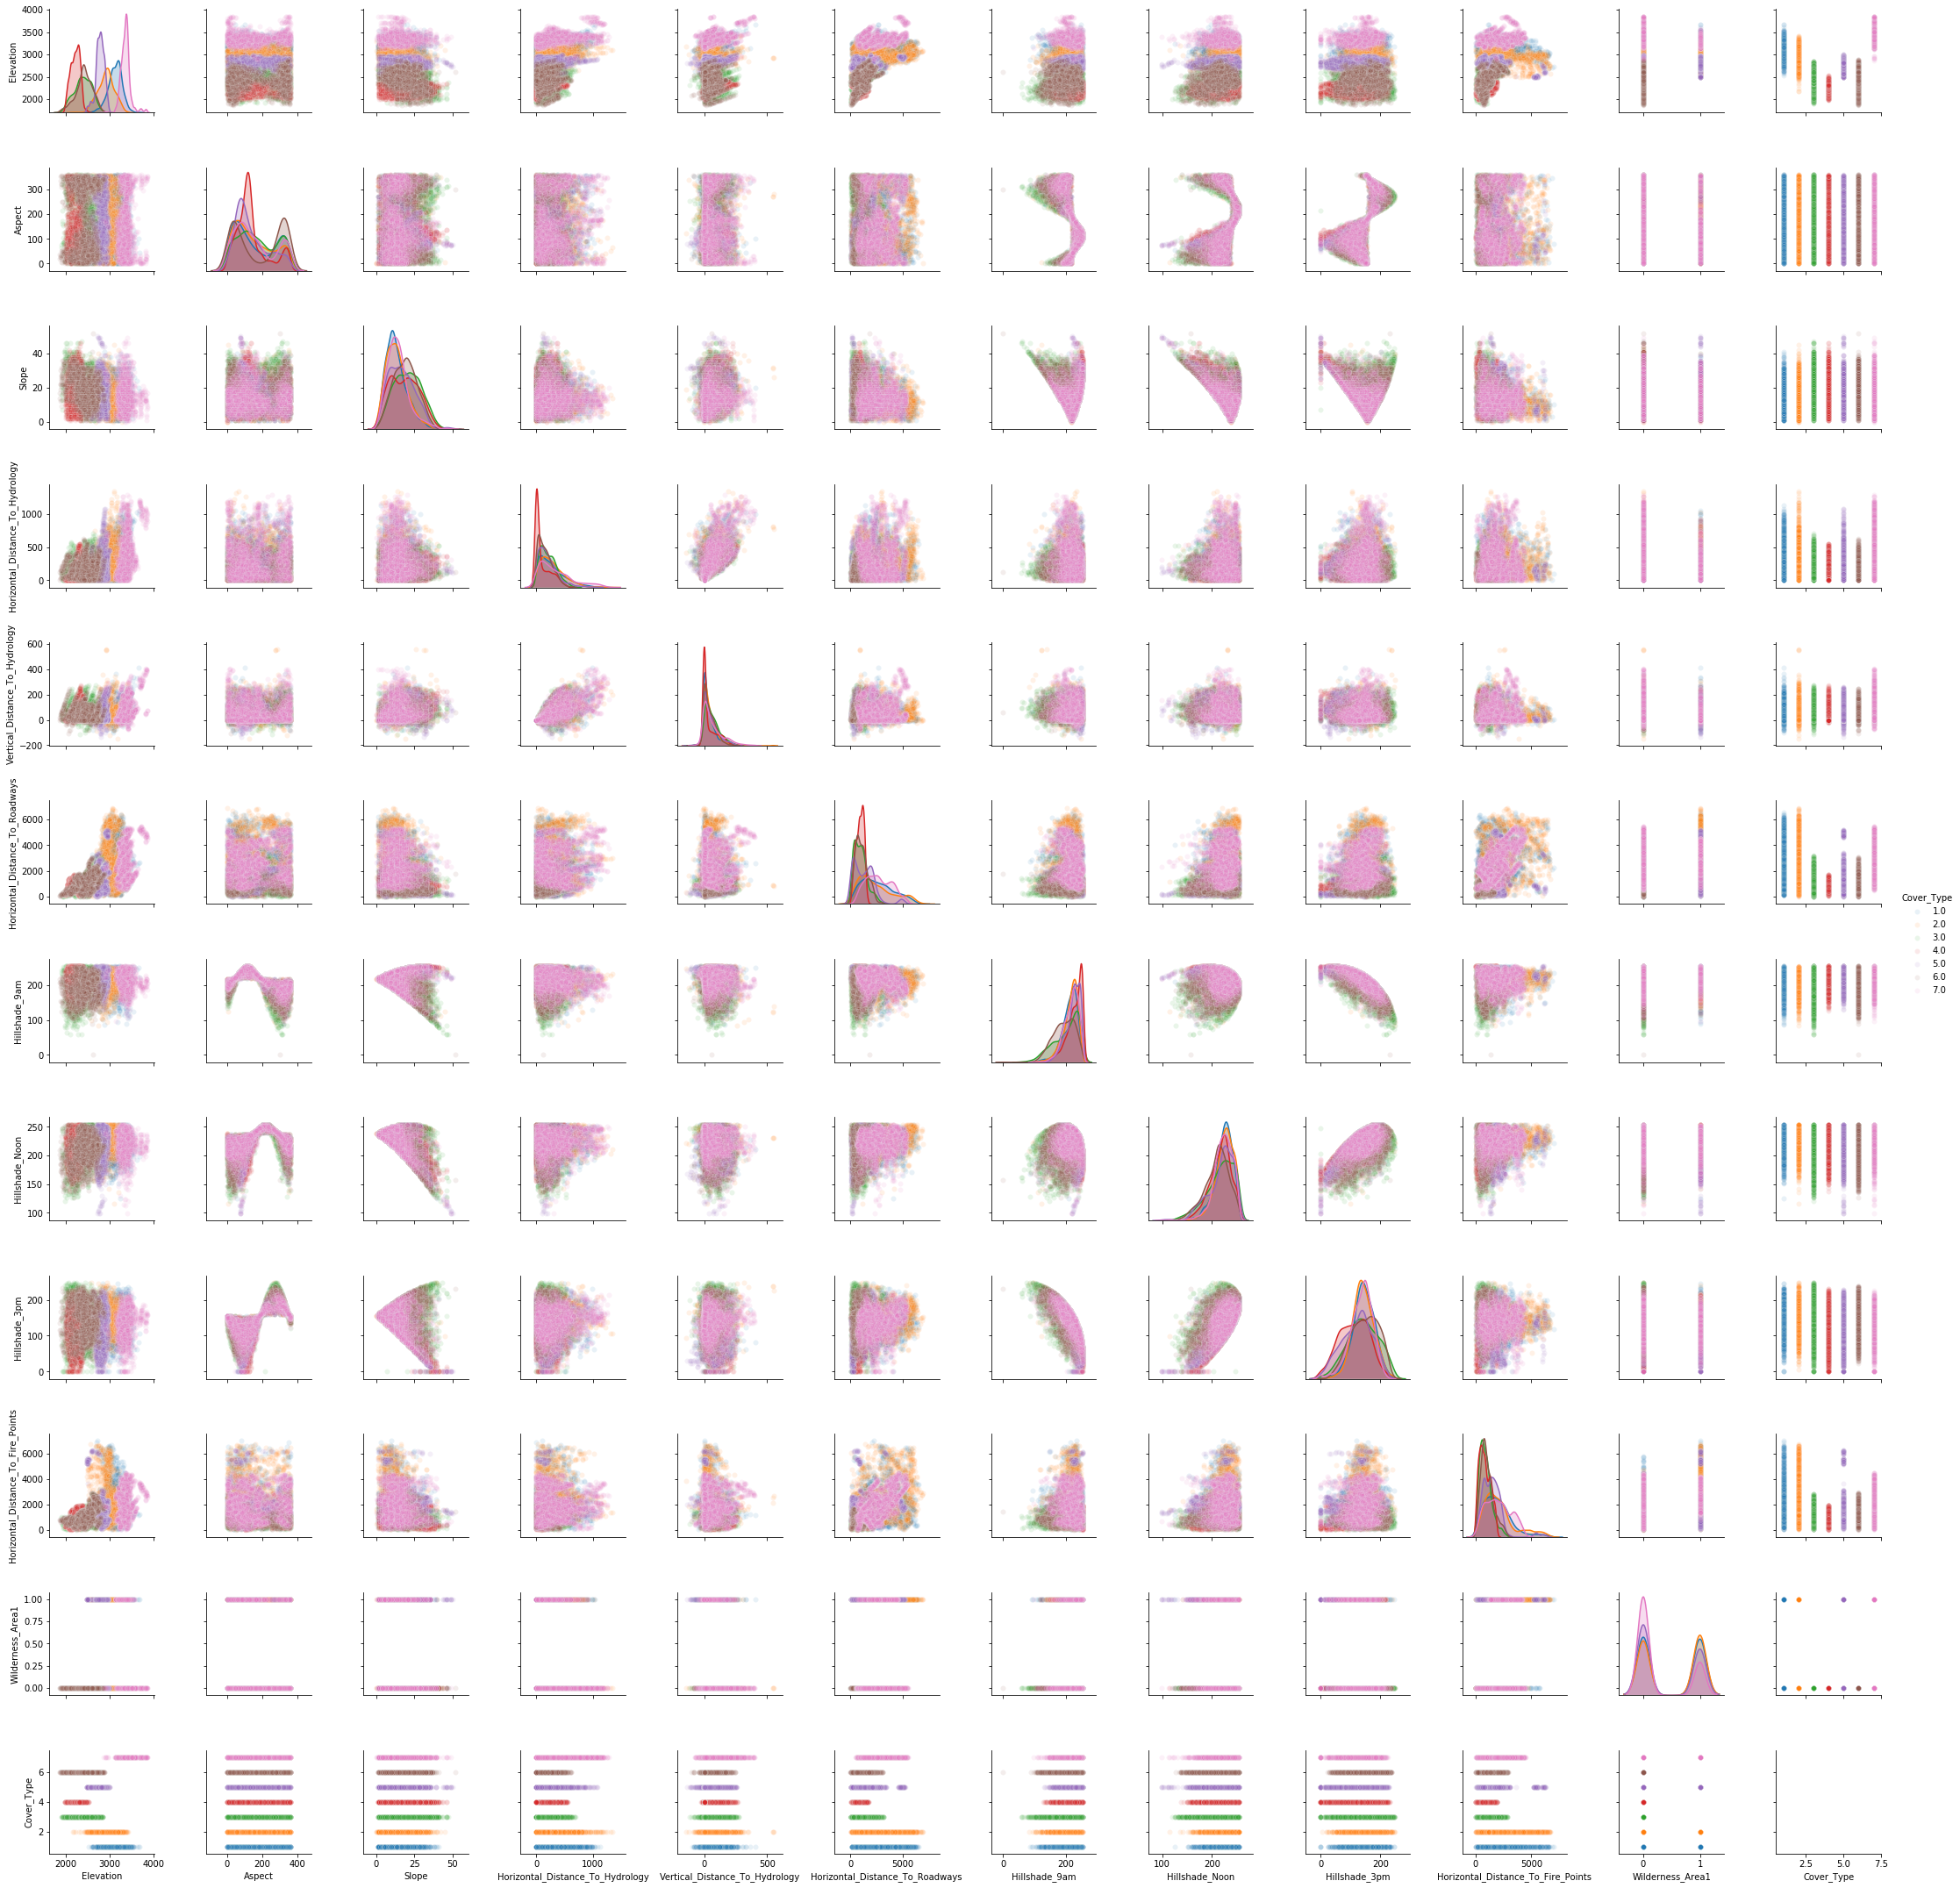

In [10]:
# Generate correlogram
continuous_vars = list(train.columns[0:11])
continuous_vars.append("Cover_Type")

sns.pairplot(train[(continuous_vars)], kind='scatter', hue="Cover_Type", plot_kws= {'alpha': 0.1}); plt.show()

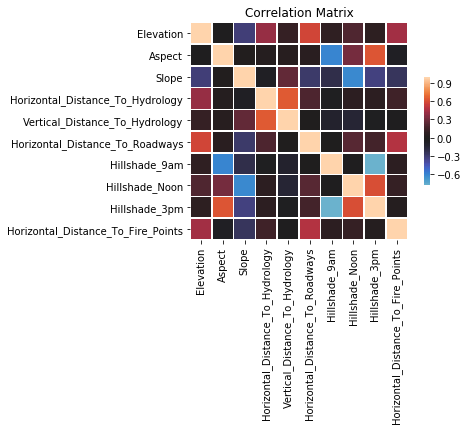

In [11]:


sns.heatmap(train[train.columns[0:10]].corr(),center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix'); plt.show()

## Feature by Feature Exploration

In [12]:
# feature engineering 1

In [13]:
# Make a new feature to visualize relationship with wilderness areas
train['Wilderness_Area'] = train.Wilderness_Area1+2*train.Wilderness_Area2+3*train.Wilderness_Area3+4*train.Wilderness_Area4
train['Wilderness_Area'] = train['Wilderness_Area'].astype('int')

test['Wilderness_Area'] = test.Wilderness_Area1+2*test.Wilderness_Area2+3*test.Wilderness_Area3+4*test.Wilderness_Area4
test['Wilderness_Area'] = test['Wilderness_Area'].astype('int')




### 1. Elevation - Data Exploration

In [14]:
# Create a function to automate the visualization of features for QC and analysis
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
def visualize_feature(feature, target, feature2):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False,figsize=(20,5))


    ax1.hist(train[feature], bins=100,label='train set',color='purple',alpha=0.4,density=True)
    ax1.hist(test[feature], bins=100,label='test set', color='green',alpha=0.4,density=True)
    ax1.set_title('Histogram: '+ str(feature))
    ax1.set_xlabel(str(feature))
    ax1.legend()


    ax2.scatter(train[feature],train[target],c=train[target])
    ax2.set_title(str(feature)+ ' vs. '+ str(target))
    ax2.set_xlabel(str(feature))
    ax2.set_ylabel(Cover_Type_lst)
    
  #  Axes.violinplot(self, dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, *, data=None)[source]¶
    
    ax3.scatter(train[feature],train[feature2], c=train[target],alpha=0.3)
    ax3.set_title(str(feature2)+ ' vs. '+ str(feature))
    ax3.set_xlabel(str(feature)); ax3.set_ylabel(str(feature2)); 
    
    ax4.scatter(train[feature], train['Elevation'], c=train[target],alpha=0.3)
    ax4.set_title(str(feature)+ ' vs. '+ str('Elevation'))
    ax4.set_xlabel(str(feature))
    ax4.set_ylabel(str('Elevation')) 
    
    # 3dplot
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(train.Aspect, train.Elevation, train.Elevation, c=train.Cover_Type, s=60)
    #ax.view_init(30, 185)
    #plt.show()
    
    plt.show()

Findings:
- Elevation distributions are starkly different in train and test sets.
- Elevation is the dominant raw feature, separating cover types fairly well on its own.
New Feature Calculated:
Wilderness_Area -> Helpful for plotting categorical 

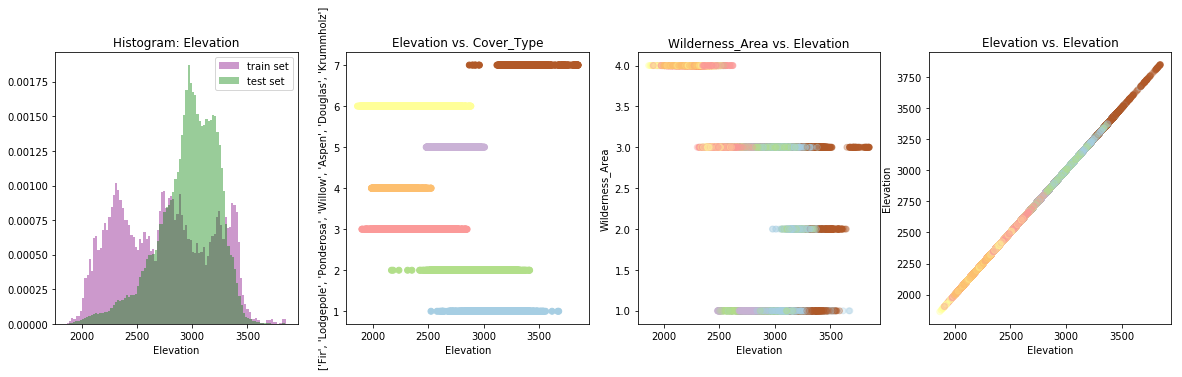

In [15]:
visualize_feature('Elevation','Cover_Type','Wilderness_Area')

### 2. Aspect - Data Exploration

- Conclusions: Aspect is not relevant to Forest Cover
- Proof below

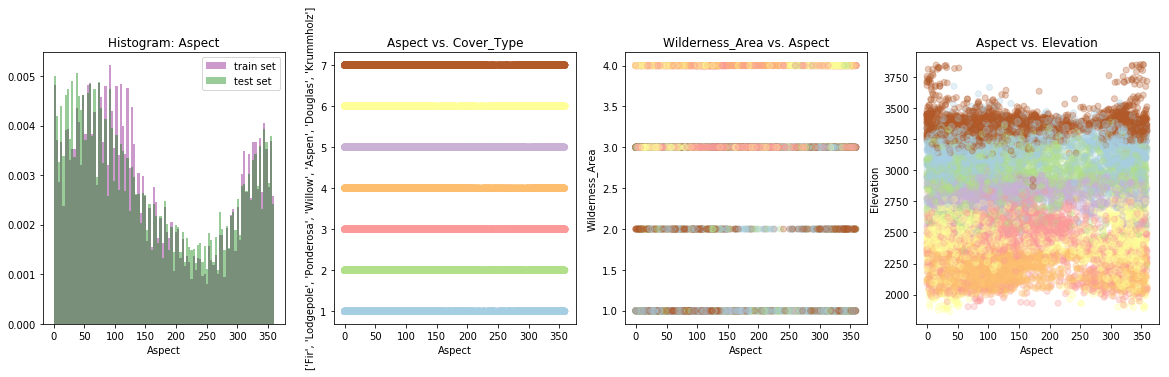

In [16]:
visualize_feature('Aspect','Cover_Type','Wilderness_Area')

In [17]:
Cover_Type

{1: 'Spruce/Fir',
 2: 'Lodgepole Pine',
 3: 'Ponderosa Pine',
 4: 'Cottonwood/Willow',
 5: 'Aspen',
 6: 'Douglas Fir',
 7: 'Krummholz'}

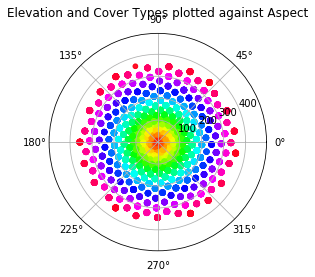

In [18]:
from matplotlib.pyplot import polar

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(train.Aspect, train.Aspect, c=train.Aspect, s=train.Elevation/100, cmap='hsv', alpha=0.75)
ax.set_title('Elevation and Cover Types plotted against Aspect')
plt.show()

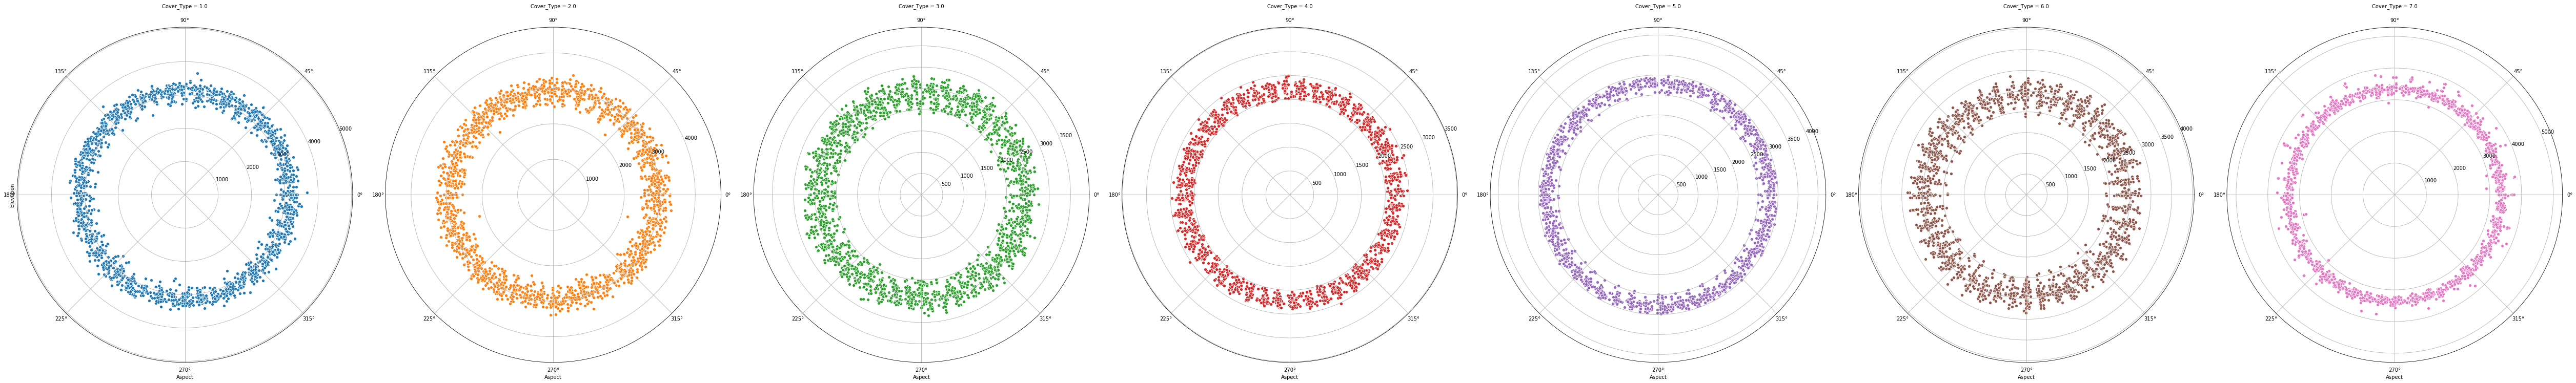

In [19]:
# aspect
g = sns.FacetGrid(train, col="Cover_Type", hue="Cover_Type",
                  subplot_kws=dict(projection='polar'), height=10,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "Aspect", "Elevation")

### 3. Slope

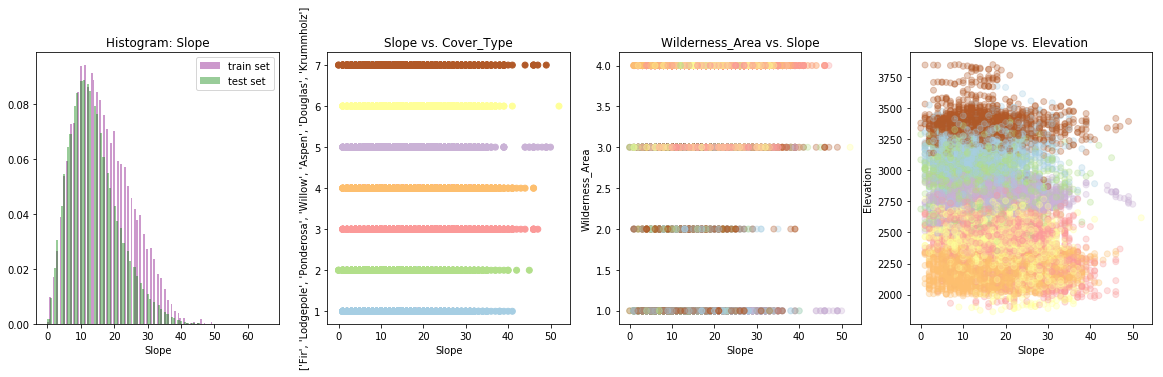

In [20]:
visualize_feature('Slope','Cover_Type','Wilderness_Area')

### 4 & 5 Horizontal / Vertical Distance to Hydrology - Data Exploration

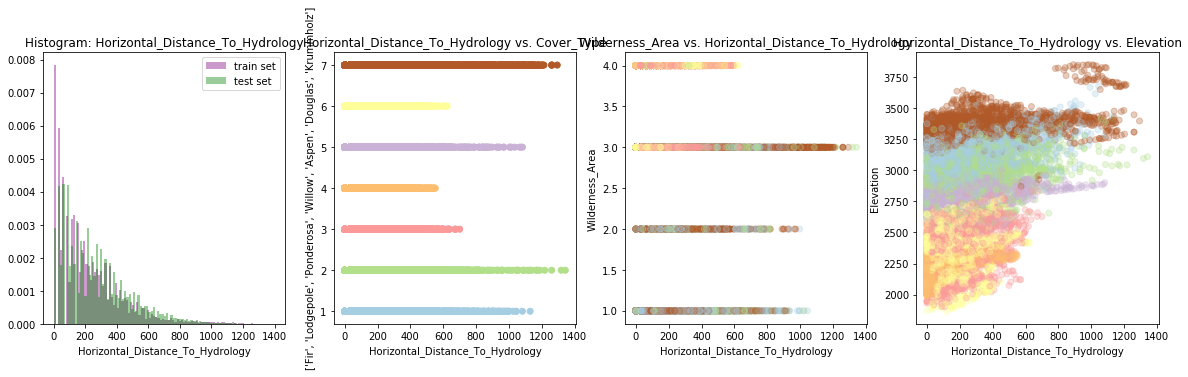

In [21]:
visualize_feature('Horizontal_Distance_To_Hydrology','Cover_Type','Wilderness_Area')

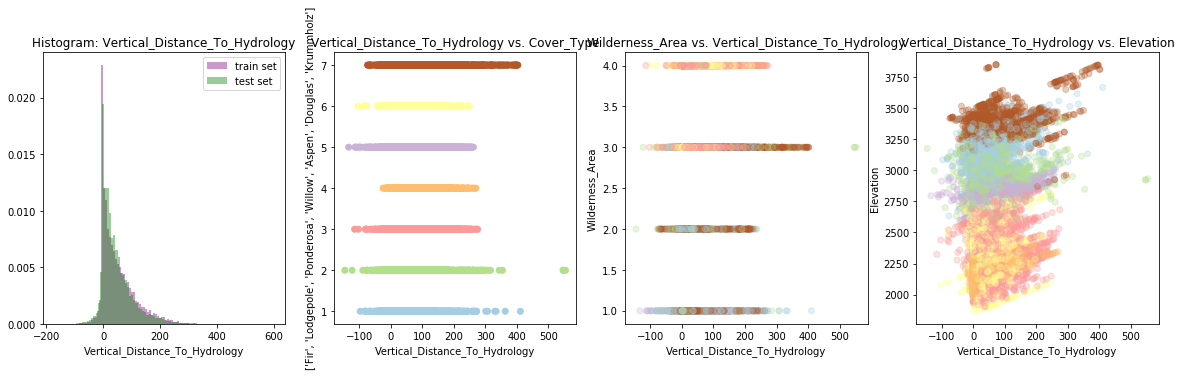

In [22]:
visualize_feature('Vertical_Distance_To_Hydrology','Cover_Type','Wilderness_Area')

### 6, 7, & 8. Hillshade 9 am, Noon, 3pm

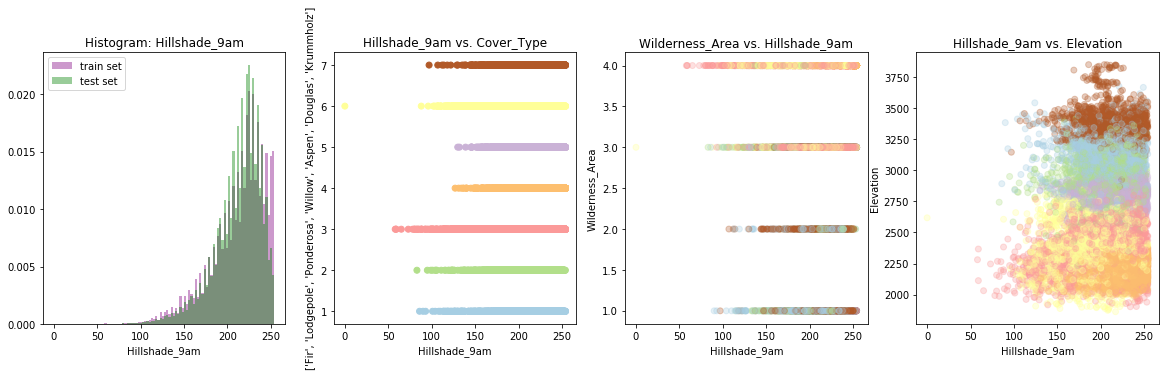

In [23]:
visualize_feature('Hillshade_9am','Cover_Type','Wilderness_Area')

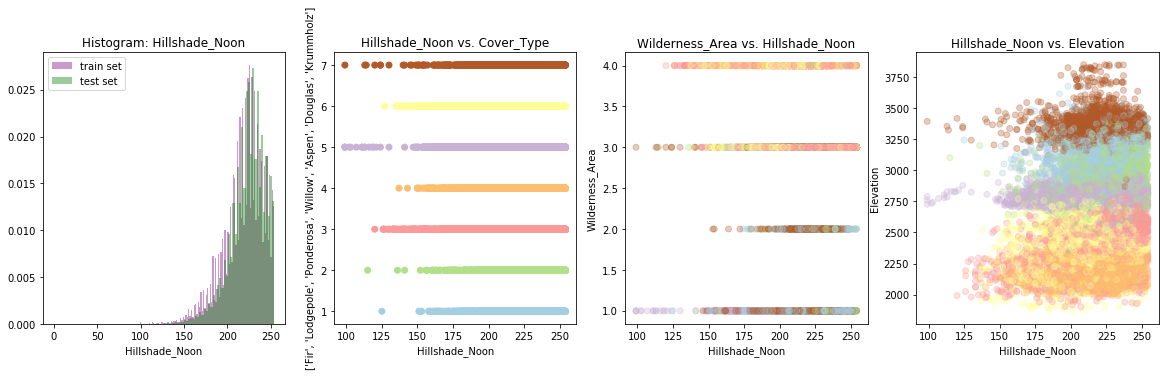

In [24]:
visualize_feature('Hillshade_Noon','Cover_Type','Wilderness_Area')

> Domain knowledge: Douglas fir prefers full to partial shade. 

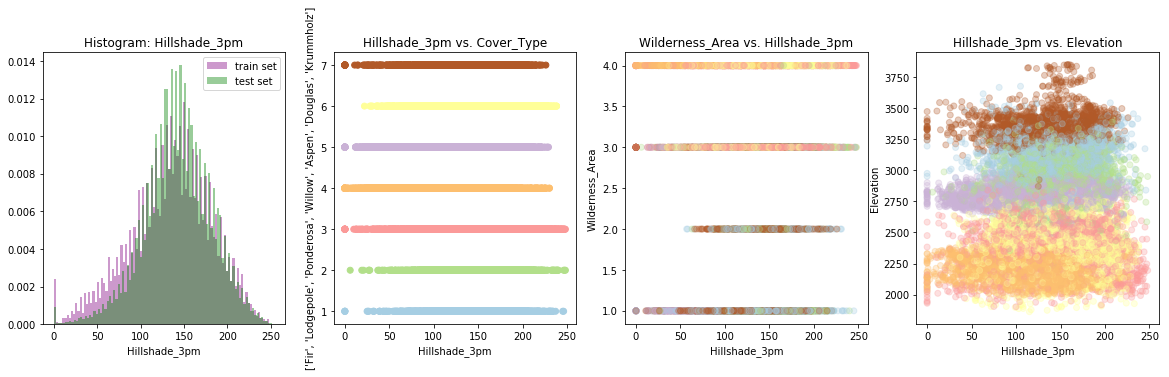

In [25]:
visualize_feature('Hillshade_3pm','Cover_Type','Wilderness_Area')

### 9. Horizontal Distance to Roadways

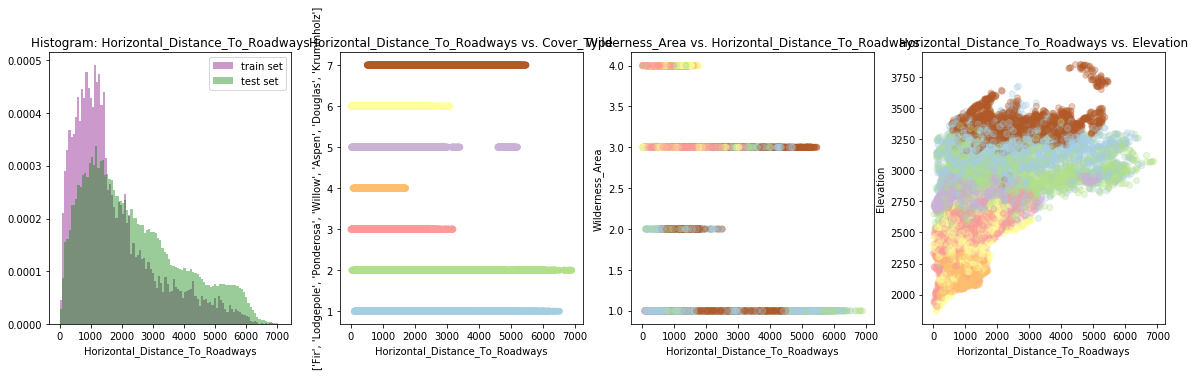

In [26]:
visualize_feature('Horizontal_Distance_To_Roadways','Cover_Type','Wilderness_Area')

### 10. Horizontal Distance to Fire Points

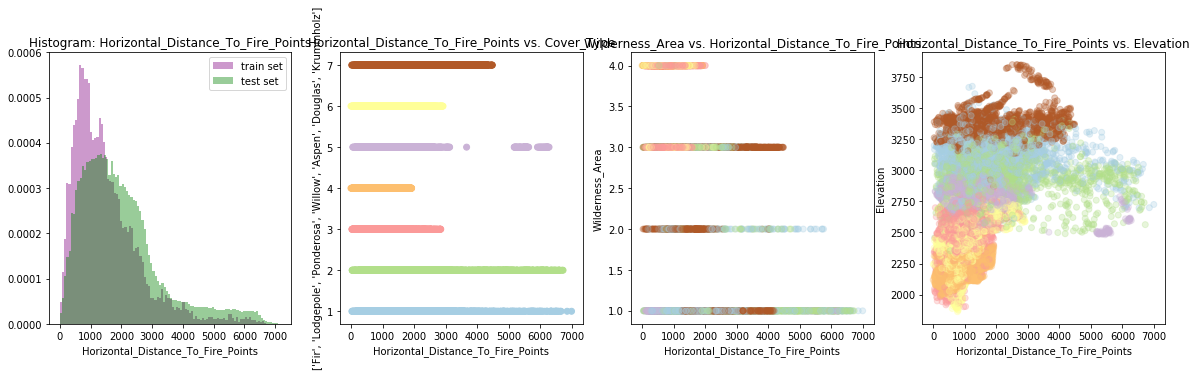

In [27]:
visualize_feature('Horizontal_Distance_To_Fire_Points','Cover_Type','Wilderness_Area')

### 11. Wilderness Area

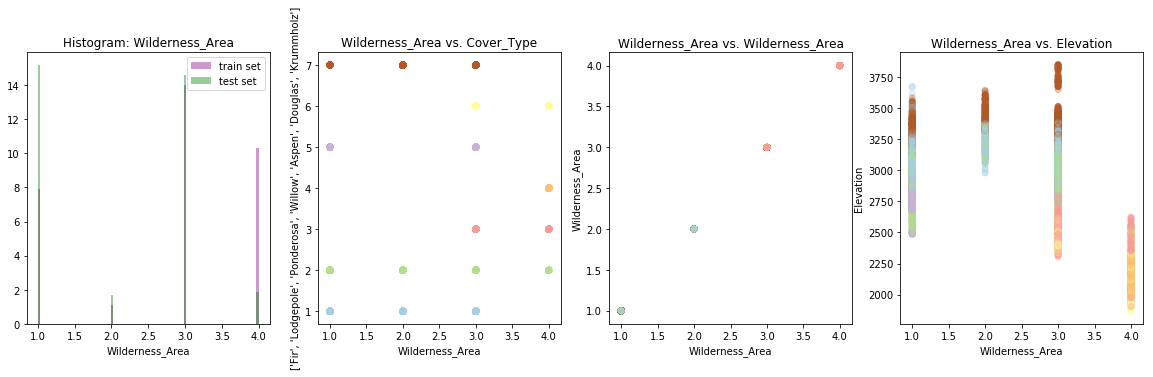

In [28]:
visualize_feature('Wilderness_Area','Cover_Type','Wilderness_Area')

### 12. Soil Lithics

In [29]:
# The work to develop this table was done outside of this notebook using domain information researched. These
# values in some cases are approximate
soil_properties_df = pd.read_csv('Soils/Sheet 3-Table 1.csv')
soil_properties_df.head()

Unnamed: 0  Soil_Lithics  Soil_Drainage  Soil_Depth  Rocky_Terrain
0  Soil_Type1             3              3           0              2
1  Soil_Type2             2              2           1              0
2  Soil_Type3             5              2           2              2
3  Soil_Type4             5              2           1              2
4  Soil_Type5             5              2           1              2

In [30]:
soil_properties_df.Soil_Lithics.unique()

array([3, 2, 5, 1, 0, 4])

In [31]:
## transpose table, then make table columns = Unnamed, then 
soil_properties_df = soil_properties_df.T
soil_properties_df


0           1           2           3           4   \
Unnamed: 0     Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5   
Soil_Lithics            3           2           5           5           5   
Soil_Drainage           3           2           2           2           2   
Soil_Depth              0           1           2           1           1   
Rocky_Terrain           2           0           2           2           2   

                       5           6           7           8            9   \
Unnamed: 0     Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10   
Soil_Lithics            1           0           0           2            5   
Soil_Drainage           2           2           2           2            3   
Soil_Depth              1           4           1           3            1   
Rocky_Terrain           2           0           0           0            2   

                  ...                30           31           32  \
Unnamed: 0        ...       Soil_Type31  Soil_Type32  Soil_Type33   
Soil_Lithics      ...                 3            3            3   
Soil_Drainage     ...                 3            3            3   
Soil_Depth        ...                 1            0            1   
Rocky_Terrain     ...                 0            2            1   

                        33           34           35           36  \
Unnamed: 0     Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37   
Soil_Lithics             3            0            3            3   
Soil_Drainage            2            2            2            2   
Soil_Depth               0            0            1            1   
Rocky_Terrain            2            2            1            0   

                        37           38           39  
Unnamed: 0     Soil_Type38  Soil_Type39  Soil_Type40  
Soil_Lithics             3            3            3  
Soil_Drainage            1            2            4  
Soil_Depth               3            3            0  
Rocky_Terrain            0            0            1  

[5 rows x 40 columns]

In [32]:
# Add column names properly
soil_properties_df.drop('Unnamed: 0',inplace=True)
soil_types_lst = train.columns[len(train.columns)-43:len(train.columns)-3]
soil_properties_df.columns = soil_types_lst
soil_properties_df

Wilderness_Area4 Soil_Type1 Soil_Type2 Soil_Type3 Soil_Type4  \
Soil_Lithics                 3          2          5          5          5   
Soil_Drainage                3          2          2          2          2   
Soil_Depth                   0          1          2          1          1   
Rocky_Terrain                2          0          2          2          2   

              Soil_Type5 Soil_Type6 Soil_Type7 Soil_Type8 Soil_Type9  \
Soil_Lithics           1          0          0          2          5   
Soil_Drainage          2          2          2          2          3   
Soil_Depth             1          4          1          3          1   
Rocky_Terrain          2          0          0          0          2   

                  ...     Soil_Type30 Soil_Type31 Soil_Type32 Soil_Type33  \
Soil_Lithics      ...               3           3           3           3   
Soil_Drainage     ...               3           3           3           2   
Soil_Depth        ...               1           0           1           0   
Rocky_Terrain     ...               0           2           1           2   

              Soil_Type34 Soil_Type35 Soil_Type36 Soil_Type37 Soil_Type38  \
Soil_Lithics            0           3           3           3           3   
Soil_Drainage           2           2           2           1           2   
Soil_Depth              0           1           1           3           3   
Rocky_Terrain           2           1           0           0           0   

              Soil_Type39  
Soil_Lithics            3  
Soil_Drainage           4  
Soil_Depth              0  
Rocky_Terrain           1  

[4 rows x 40 columns]

In [33]:
# create new columns in train set by calculating properties for entry based on soil type.
import operator 



for p in soil_properties_df.index:
    
    soil_property = list(train.Soil_Type1 - train.Soil_Type1) # list of zeros
    
    for s in soil_types_lst:
        property_ = list(train[s]*soil_properties_df[s][p])
        soil_property = list(map(operator.add,soil_property,property_))

    train[p] = soil_property
train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                
1.0     2596.0    51.0    3.0                             258.0   
2.0     2590.0    56.0    2.0                             212.0   
3.0     2804.0   139.0    9.0                             268.0   
4.0     2785.0   155.0   18.0                             242.0   
5.0     2595.0    45.0    2.0                             153.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                     
1.0                             0.0                            510.0   
2.0                            -6.0                            390.0   
3.0                            65.0                           3180.0   
4.0                           118.0                           3090.0   
5.0                            -1.0                            391.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                  
1.0          221.0           232.0          148.0   
2.0          220.0           235.0          151.0   
3.0          234.0           238.0          135.0   
4.0          238.0           238.0          122.0   
5.0          220.0           234.0          150.0   

     Horizontal_Distance_To_Fire_Points      ...        Soil_Type37  \
Id                                           ...                      
1.0                              6279.0      ...                0.0   
2.0                              6225.0      ...                0.0   
3.0                              6121.0      ...                0.0   
4.0                              6211.0      ...                0.0   
5.0                              6172.0      ...                0.0   

     Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  Wilderness_Area  \
Id                                                                        
1.0          0.0          0.0          0.0         5.0                1   
2.0          0.0          0.0          0.0         5.0                1   
3.0          0.0          0.0          0.0         2.0                1   
4.0          0.0          0.0          0.0         2.0                1   
5.0          0.0          0.0          0.0         5.0                1   

     Soil_Lithics  Soil_Drainage  Soil_Depth  Rocky_Terrain  
Id                                                           
1.0           3.0            2.0         1.0            1.0  
2.0           3.0            2.0         1.0            1.0  
3.0           5.0            3.0         1.0            1.0  
4.0           3.0            3.0         1.0            0.0  
5.0           3.0            2.0         1.0            1.0  

[5 rows x 60 columns]

In [34]:
for p in soil_properties_df.index:
    
    soil_property = list(test.Soil_Type1 - test.Soil_Type1) # list of zeros
    
    for s in soil_types_lst:
        property_ = list(test[s]*soil_properties_df[s][p])
        soil_property = list(map(operator.add,soil_property,property_))
        
    
    test[p] = soil_property
test.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                    
15121.0     2680.0   354.0   14.0                               0.0   
15122.0     2683.0     0.0   13.0                               0.0   
15123.0     2713.0    16.0   15.0                               0.0   
15124.0     2709.0    24.0   17.0                               0.0   
15125.0     2706.0    29.0   19.0                               0.0   

         Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                         
15121.0                             0.0                           2684.0   
15122.0                             0.0                           2654.0   
15123.0                             0.0                           2980.0   
15124.0                             0.0                           2950.0   
15125.0                             0.0                           2920.0   

         Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                      
15121.0          196.0           214.0          156.0   
15122.0          201.0           216.0          152.0   
15123.0          206.0           208.0          137.0   
15124.0          208.0           201.0          125.0   
15125.0          210.0           195.0          115.0   

         Horizontal_Distance_To_Fire_Points      ...        Soil_Type36  \
Id                                               ...                      
15121.0                              6645.0      ...                0.0   
15122.0                              6675.0      ...                0.0   
15123.0                              6344.0      ...                0.0   
15124.0                              6374.0      ...                0.0   
15125.0                              6404.0      ...                0.0   

         Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Wilderness_Area  \
Id                                                                             
15121.0          0.0          0.0          0.0          0.0                1   
15122.0          0.0          0.0          0.0          0.0                1   
15123.0          0.0          0.0          0.0          0.0                1   
15124.0          0.0          0.0          0.0          0.0                1   
15125.0          0.0          0.0          0.0          0.0                1   

         Soil_Lithics  Soil_Drainage  Soil_Depth  Rocky_Terrain  
Id                                                               
15121.0           3.0            2.0         1.0            1.0  
15122.0           3.0            2.0         1.0            1.0  
15123.0           3.0            2.0         1.0            1.0  
15124.0           3.0            2.0         1.0            1.0  
15125.0           3.0            2.0         1.0            1.0  

[5 rows x 59 columns]

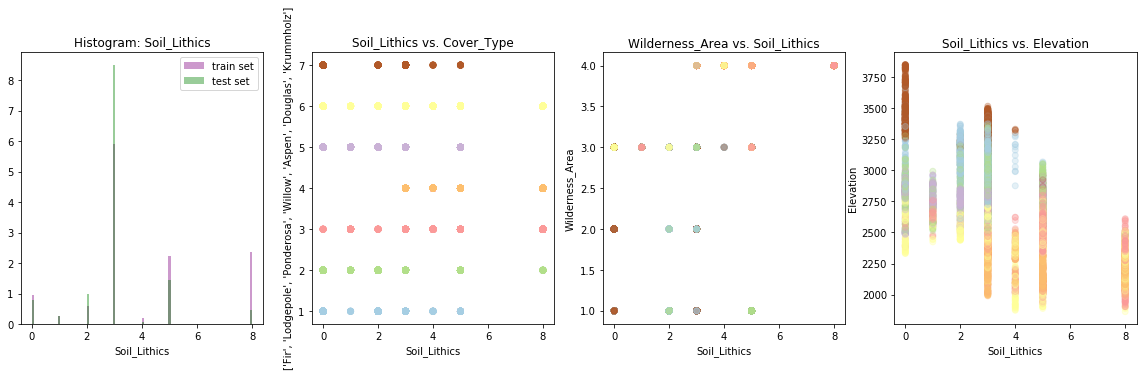

In [35]:
visualize_feature('Soil_Lithics','Cover_Type','Wilderness_Area')

In [36]:
train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                
1.0     2596.0    51.0    3.0                             258.0   
2.0     2590.0    56.0    2.0                             212.0   
3.0     2804.0   139.0    9.0                             268.0   
4.0     2785.0   155.0   18.0                             242.0   
5.0     2595.0    45.0    2.0                             153.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                     
1.0                             0.0                            510.0   
2.0                            -6.0                            390.0   
3.0                            65.0                           3180.0   
4.0                           118.0                           3090.0   
5.0                            -1.0                            391.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                  
1.0          221.0           232.0          148.0   
2.0          220.0           235.0          151.0   
3.0          234.0           238.0          135.0   
4.0          238.0           238.0          122.0   
5.0          220.0           234.0          150.0   

     Horizontal_Distance_To_Fire_Points      ...        Soil_Type37  \
Id                                           ...                      
1.0                              6279.0      ...                0.0   
2.0                              6225.0      ...                0.0   
3.0                              6121.0      ...                0.0   
4.0                              6211.0      ...                0.0   
5.0                              6172.0      ...                0.0   

     Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  Wilderness_Area  \
Id                                                                        
1.0          0.0          0.0          0.0         5.0                1   
2.0          0.0          0.0          0.0         5.0                1   
3.0          0.0          0.0          0.0         2.0                1   
4.0          0.0          0.0          0.0         2.0                1   
5.0          0.0          0.0          0.0         5.0                1   

     Soil_Lithics  Soil_Drainage  Soil_Depth  Rocky_Terrain  
Id                                                           
1.0           3.0            2.0         1.0            1.0  
2.0           3.0            2.0         1.0            1.0  
3.0           5.0            3.0         1.0            1.0  
4.0           3.0            3.0         1.0            0.0  
5.0           3.0            2.0         1.0            1.0  

[5 rows x 60 columns]

In [37]:
# need to figure out where soil_lithic 8 is coming from
# train[(train.Soil_Lithics == 8)]

### 13. Drainage

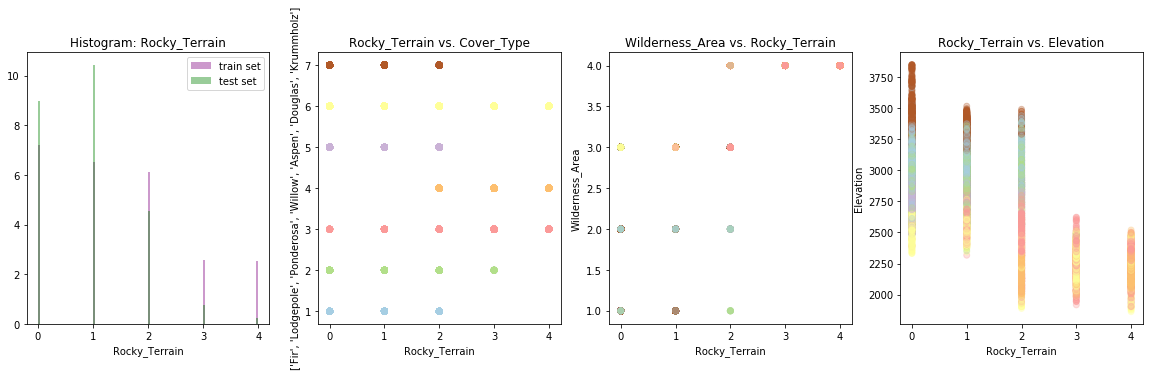

In [38]:
# compute based on soil characteristics - waterlogged, well drained, dry
visualize_feature('Rocky_Terrain','Cover_Type','Wilderness_Area')

### 14. Soil Depth

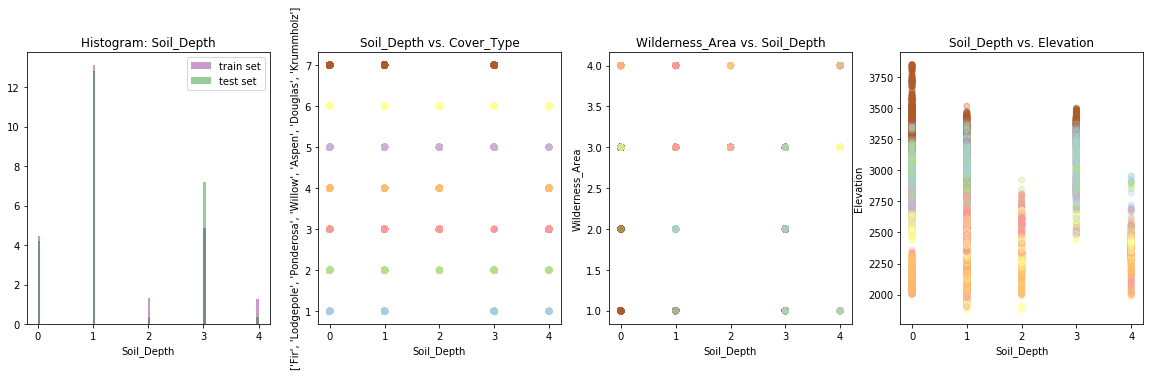

In [39]:
visualize_feature('Soil_Depth','Cover_Type','Wilderness_Area')

### 15. Rocky Terrain

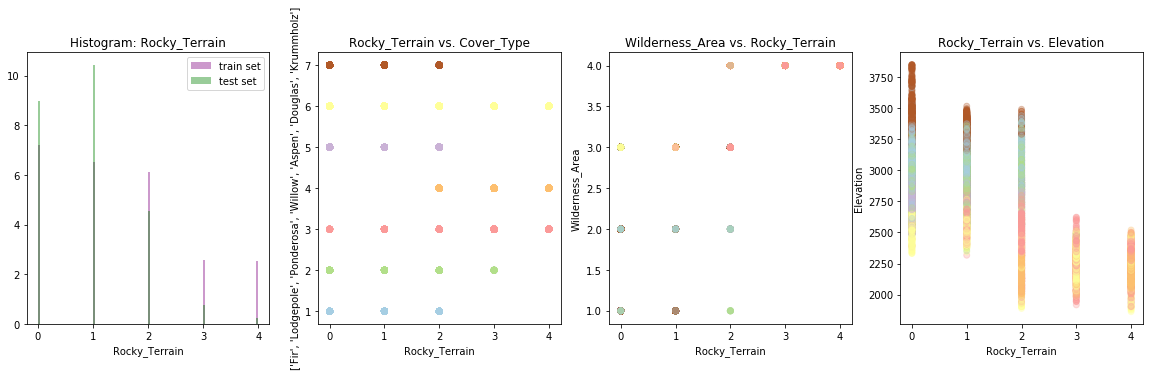

In [40]:
visualize_feature('Rocky_Terrain','Cover_Type','Wilderness_Area')

### 14. Total Light Exposure

In [55]:
hill_df = pd.DataFrame([train.Hillshade_9am,train.Hillshade_Noon,train.Hillshade_3pm])
hill_df = hill_df.T
hill_df['Hillshade_6am'] = train.Hillshade_9am - train.Hillshade_9am
hill_df['Hillshade_6pm'] = train.Hillshade_9am - train.Hillshade_9am
hill_df = hill_df.T
hill_df.head()

hill_df2 = pd.DataFrame([test.Hillshade_9am,test.Hillshade_Noon,test.Hillshade_3pm])
hill_df2 = hill_df2.T
hill_df2['Hillshade_6am'] = test.Hillshade_9am - test.Hillshade_9am
hill_df2['Hillshade_6pm'] = test.Hillshade_9am - test.Hillshade_9am
hill_df2 = hill_df2.T
hill_df2.head()

Id              15121.0   15122.0   15123.0   15124.0   15125.0   15126.0   \
Hillshade_9am      196.0     201.0     206.0     208.0     210.0     206.0   
Hillshade_Noon     214.0     216.0     208.0     201.0     195.0     200.0   
Hillshade_3pm      156.0     152.0     137.0     125.0     115.0     127.0   
Hillshade_6am        0.0       0.0       0.0       0.0       0.0       0.0   
Hillshade_6pm        0.0       0.0       0.0       0.0       0.0       0.0   

Id              15127.0   15128.0   15129.0   15130.0     ...     581003.0  \
Hillshade_9am      202.0     202.0     208.0     205.0    ...        230.0   
Hillshade_Noon     202.0     207.0     211.0     209.0    ...        240.0   
Hillshade_3pm      133.0     140.0     138.0     138.0    ...        126.0   
Hillshade_6am        0.0       0.0       0.0       0.0    ...          0.0   
Hillshade_6pm        0.0       0.0       0.0       0.0    ...          0.0   

Id              581004.0  581005.0  581006.0  581007.0  581008.0  581009.0  \
Hillshade_9am      236.0     238.0     237.0     238.0     240.0     240.0   
Hillshade_Noon     237.0     236.0     238.0     238.0     237.0     237.0   
Hillshade_3pm      116.0     115.0     119.0     119.0     118.0     119.0   
Hillshade_6am        0.0       0.0       0.0       0.0       0.0       0.0   
Hillshade_6pm        0.0       0.0       0.0       0.0       0.0       0.0   

Id              581010.0  581011.0  581012.0  
Hillshade_9am      236.0     230.0     231.0  
Hillshade_Noon     241.0     245.0     244.0  
Hillshade_3pm      130.0     143.0     141.0  
Hillshade_6am        0.0       0.0       0.0  
Hillshade_6pm        0.0       0.0       0.0  

[5 rows x 565892 columns]

In [56]:
hill_df.index =[3,6,9,0,12]
hill_df.columns = hill_df.columns.astype('int')


hill_df2.index =[3,6,9,0,12]
hill_df2.columns = hill_df2.columns.astype('int')
hill_df2

Id  15121   15122   15123   15124   15125   15126   15127   15128   15129   \
3    196.0   201.0   206.0   208.0   210.0   206.0   202.0   202.0   208.0   
6    214.0   216.0   208.0   201.0   195.0   200.0   202.0   207.0   211.0   
9    156.0   152.0   137.0   125.0   115.0   127.0   133.0   140.0   138.0   
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  15130    ...    581003  581004  581005  581006  581007  581008  581009  \
3    205.0   ...     230.0   236.0   238.0   237.0   238.0   240.0   240.0   
6    209.0   ...     240.0   237.0   236.0   238.0   238.0   237.0   237.0   
9    138.0   ...     126.0   116.0   115.0   119.0   119.0   118.0   119.0   
0      0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  581010  581011  581012  
3    236.0   230.0   231.0  
6    241.0   245.0   244.0  
9    130.0   143.0   141.0  
0      0.0     0.0     0.0  
12     0.0     0.0     0.0  

[5 rows x 565892 columns]

In [57]:
# typical mode
hill_df = hill_df.sort_index()

hill_df2 =  hill_df2.sort_index()

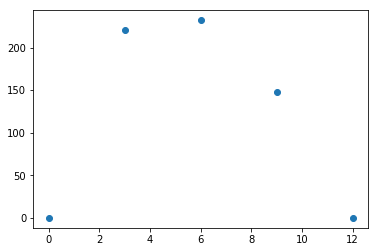

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = list(hill_df.index)
y = list(hill_df[1])

plt.scatter(X,y)


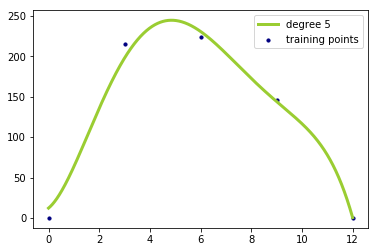

In [48]:
# generate a polynomial regression model to approximate total exposure to sunlight.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# generate points used to plot
x_plot = np.arange(0,12,0.001)

# generate points and keep a subset of them

x = np.array([0,3,6,9,12])
y = hill_df[2000]

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 3
plt.scatter(x, y, color='navy', s=10, marker='o', label="training points")

#for count, degree in enumerate([5]):
model = make_pipeline(PolynomialFeatures(degree=5), Ridge())
model.fit(X, y)
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot, color=colors[1], linewidth=lw,
         label="degree %d" % 5)

plt.legend(loc='upper right')

plt.show()

In [49]:
# calculate light exposure for training set
light_list = []

for i in range(len(train)):
    # generate points used to plot
    x_plot = np.arange(0,12,0.001)

    # generate points and keep a subset of them

    x = np.array([0,3,6,9,12])
    y = hill_df[i+1]

    # create matrix versions of these arrays
    X = x[:, np.newaxis]
    X_plot = x_plot[:, np.newaxis]

    model = make_pipeline(PolynomialFeatures(degree=5), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    
    light_list.append(int(np.sum(y_plot)))
# add light exposure as a new column
train['Light_Exposure'] = light_list

train.head()

[1885025,
 1899120,
 1890883,
 1851477,
 1893138,
 1894791,
 1834352,
 1868480,
 1810059,
 1787840,
 1947707,
 1898631,
 1738783,
 1973457,
 1923357,
 1837840,
 1932939,
 1839914,
 1891792,
 1857244,
 1811040,
 1995035,
 1639159,
 1806879,
 1821407,
 1899372,
 1926468,
 1847217,
 1917067,
 1644777,
 1552624,
 1853588,
 1875079,
 1852719,
 1800589,
 1617300,
 1597315,
 1846569,
 1445672,
 1819124,
 1904121,
 1909375,
 1811040,
 1686106,
 1893390,
 1823733,
 1846205,
 1869097,
 1844495,
 1853953,
 1530461,
 1745520,
 1896625,
 1739549,
 1830752,
 1787760,
 1773368,
 1858954,
 1886847,
 1846681,
 1858225,
 1808842,
 1840223,
 1828734,
 1726659,
 1795223,
 1834661,
 1774012,
 1845588,
 1822640,
 1924018,
 1715423,
 1767626,
 1839409,
 1794298,
 1737703,
 1772061,
 1910524,
 1851823,
 1766343,
 1801514,
 1845087,
 1610563,
 1754664,
 1828370,
 1736200,
 1692717,
 1851318,
 1795223,
 1920934,
 1875079,
 1723395,
 1813141,
 1937075,
 1790278,
 1793934,
 1922252,
 1869153,
 1886791,
 1815733,


In [59]:
hill_df2

Id  15121   15122   15123   15124   15125   15126   15127   15128   15129   \
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    196.0   201.0   206.0   208.0   210.0   206.0   202.0   202.0   208.0   
6    214.0   216.0   208.0   201.0   195.0   200.0   202.0   207.0   211.0   
9    156.0   152.0   137.0   125.0   115.0   127.0   133.0   140.0   138.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  15130    ...    581003  581004  581005  581006  581007  581008  581009  \
0      0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    205.0   ...     230.0   236.0   238.0   237.0   238.0   240.0   240.0   
6    209.0   ...     240.0   237.0   236.0   238.0   238.0   237.0   237.0   
9    138.0   ...     126.0   116.0   115.0   119.0   119.0   118.0   119.0   
12     0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  581010  581011  581012  
0      0.0     0.0     0.0  
3    236.0   230.0   231.0  
6    241.0   245.0   244.0  
9    130.0   143.0   141.0  
12     0.0     0.0     0.0  

[5 rows x 565892 columns]

In [61]:
light_list = []

for i in range(15121, 15121 + len(test)):
    # generate points used to plot
    x_plot = np.arange(0,12,0.001)

    # generate points and keep a subset of them

    x = np.array([0,3,6,9,12])
    y = hill_df2[i]

    # create matrix versions of these arrays
    X = x[:, np.newaxis]
    X_plot = x_plot[:, np.newaxis]

    model = make_pipeline(PolynomialFeatures(degree=5), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    
    light_list.append(int(np.sum(y_plot)))
    
# add light exposure as a new column
test['Light_Exposure'] = light_list

test.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                    
15121.0     2680.0   354.0   14.0                               0.0   
15122.0     2683.0     0.0   13.0                               0.0   
15123.0     2713.0    16.0   15.0                               0.0   
15124.0     2709.0    24.0   17.0                               0.0   
15125.0     2706.0    29.0   19.0                               0.0   

         Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                         
15121.0                             0.0                           2684.0   
15122.0                             0.0                           2654.0   
15123.0                             0.0                           2980.0   
15124.0                             0.0                           2950.0   
15125.0                             0.0                           2920.0   

         Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                      
15121.0          196.0           214.0          156.0   
15122.0          201.0           216.0          152.0   
15123.0          206.0           208.0          137.0   
15124.0          208.0           201.0          125.0   
15125.0          210.0           195.0          115.0   

         Horizontal_Distance_To_Fire_Points       ...        Soil_Type37  \
Id                                                ...                      
15121.0                              6645.0       ...                0.0   
15122.0                              6675.0       ...                0.0   
15123.0                              6344.0       ...                0.0   
15124.0                              6374.0       ...                0.0   
15125.0                              6404.0       ...                0.0   

         Soil_Type38  Soil_Type39  Soil_Type40  Wilderness_Area  Soil_Lithics  \
Id                                                                              
15121.0          0.0          0.0          0.0                1           3.0   
15122.0          0.0          0.0          0.0                1           3.0   
15123.0          0.0          0.0          0.0                1           3.0   
15124.0          0.0          0.0          0.0                1           3.0   
15125.0          0.0          0.0          0.0                1           3.0   

         Soil_Drainage  Soil_Depth  Rocky_Terrain  Light_Exposure  
Id                                                                 
15121.0            2.0         1.0            1.0         1790670  
15122.0            2.0         1.0            1.0         1796596  
15123.0            2.0         1.0            1.0         1738483  
15124.0            2.0         1.0            1.0         1683229  
15125.0            2.0         1.0            1.0         1638174  

[5 rows x 60 columns]

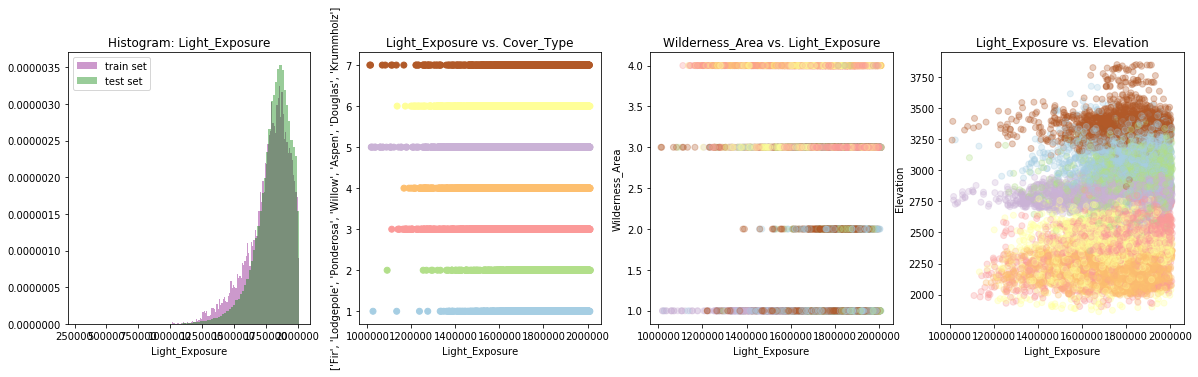

In [62]:
visualize_feature('Light_Exposure','Cover_Type','Wilderness_Area')

In [63]:
test.to_csv('test_Oct2.csv')
train.to_csv('train_Oct2.csv')

### Preprocessing Steps - Scaling

In [66]:
# Scaling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Components analysis
from sklearn.decomposition import PCA

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel




In [67]:
y_train = train.Cover_Type
X = train.drop('Cover_Type',axis=1)

In [68]:
# Standardization of Data - substracts mean value and divides by variance. 
# Result is in terms of variance ad us kess affected by outliers. Seems best choice.
scaler = StandardScaler()   
scaler.fit_transform(X)   # Scale data

# A Different scaler may be used, but data has many outliers. Thus first scaler preferred.
#scaler2 = MinMaxScaler
#scaler2.fit_transform(X)

# Scale features
X_train = pd.DataFrame(scaler.transform(X))
X_train.columns = X.columns

print('Scaled data using Standard Scaler.')

Scaled data using Standard Scaler.


In [69]:
X_train.head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -0.367095 -0.959980 -1.597132                          0.146639   
1  -0.381461 -0.914559 -1.715424                         -0.072337   
2   0.130912 -0.160577 -0.887379                          0.194243   
3   0.085421 -0.015231  0.177250                          0.070474   
4  -0.369489 -1.014485 -1.715424                         -0.353198   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.834074                        -0.908681   
1                       -0.932054                        -0.999246   
2                        0.227369                         1.106379   
3                        1.092853                         1.038455   
4                       -0.850404                        -0.998491   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.271454        0.571653       0.281259   
1       0.238732        0.703225       0.346627   
2       0.696843        0.834797      -0.002005   
3       0.827731        0.834797      -0.285268   
4       0.238732        0.659368       0.324838   

   Horizontal_Distance_To_Fire_Points       ...        Soil_Type37  \
0                            4.334805       ...          -0.047474   
1                            4.285710       ...          -0.047474   
2                            4.191156       ...          -0.047474   
3                            4.272981       ...          -0.047474   
4                            4.237524       ...          -0.047474   

   Soil_Type38  Soil_Type39  Soil_Type40  Wilderness_Area  Soil_Lithics  \
0    -0.224908    -0.213134    -0.176939        -1.607791     -0.435007   
1    -0.224908    -0.213134    -0.176939        -1.607791     -0.435007   
2    -0.224908    -0.213134    -0.176939        -1.607791      0.437778   
3    -0.224908    -0.213134    -0.176939        -1.607791     -0.435007   
4    -0.224908    -0.213134    -0.176939        -1.607791     -0.435007   

   Soil_Drainage  Soil_Depth  Rocky_Terrain  Light_Exposure  
0      -0.659514   -0.364021      -0.363241        0.667816  
1      -0.659514   -0.364021      -0.363241        0.753858  
2      -0.069289   -0.364021      -0.363241        0.703575  
3      -0.069289   -0.364021      -1.144606        0.463024  
4      -0.659514   -0.364021      -0.363241        0.717341  

[5 rows x 60 columns]

### Preprocessing - Feature Selection

In [72]:
X_train.describe()

Elevation        Aspect         Slope  \
count  1.512000e+04  1.512000e+04  1.512000e+04   
mean   3.609106e-16  1.203035e-16 -2.048920e-16   
std    1.000033e+00  1.000033e+00  1.000033e+00   
min   -2.122093e+00 -1.423270e+00 -1.952008e+00   
25%   -8.938338e-01 -8.328021e-01 -7.690867e-01   
50%    6.410523e-03 -2.786705e-01 -1.776260e-01   
75%    8.491925e-01  9.476862e-01  6.504190e-01   
max    2.632921e+00  1.847014e+00  4.199183e+00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      1.512000e+04                    1.512000e+04   
mean                       4.511382e-17                   -3.759485e-18   
std                        1.000033e+00                    1.000033e+00   
min                       -1.081532e+00                   -3.218239e+00   
25%                       -7.625885e-01                   -7.524248e-01   
50%                       -2.246683e-01                   -3.115176e-01   
75%                        4.893850e-01                    4.559875e-01   
max                        5.311625e+00                    8.212688e+00   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     1.512000e+04   1.512000e+04    1.512000e+04   
mean                      8.270868e-17  -3.637302e-16    4.812141e-16   
std                       1.000033e+00   1.000033e+00    1.000033e+00   
min                      -1.293580e+00  -6.960156e+00   -5.261370e+00   
25%                      -7.169865e-01  -5.466017e-01   -5.247795e-01   
50%                      -3.003898e-01   2.387315e-01    1.769376e-01   
75%                       4.195980e-01   7.295648e-01    7.032254e-01   
max                       3.906331e+00   1.351287e+00    1.536514e+00   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points       ...        \
count   1.512000e+04                        1.512000e+04       ...         
mean    6.015177e-17                        9.022765e-17       ...         
std     1.000033e+00                        1.000033e+00       ...         
min    -2.943587e+00                       -1.373895e+00       ...         
25%    -6.339000e-01                       -7.101984e-01       ...         
50%     6.336391e-02                       -2.319731e-01       ...         
75%     6.952593e-01                        4.337691e-01       ...         
max     2.460209e+00                        4.983955e+00       ...         

        Soil_Type37   Soil_Type38   Soil_Type39   Soil_Type40  \
count  1.512000e+04  1.512000e+04  1.512000e+04  15120.000000   
mean   1.691768e-17 -1.503794e-17  9.022765e-17      0.000000   
std    1.000033e+00  1.000033e+00  1.000033e+00      1.000033   
min   -4.747363e-02 -2.249081e-01 -2.131344e-01     -0.176939   
25%   -4.747363e-02 -2.249081e-01 -2.131344e-01     -0.176939   
50%   -4.747363e-02 -2.249081e-01 -2.131344e-01     -0.176939   
75%   -4.747363e-02 -2.249081e-01 -2.131344e-01     -0.176939   
max    2.106433e+01  4.446260e+00  4.691876e+00      5.651653   

       Wilderness_Area  Soil_Lithics  Soil_Drainage    Soil_Depth  \
count     1.512000e+04  1.512000e+04   1.512000e+04  1.512000e+04   
mean      2.255691e-17  1.503794e-17  -9.022765e-17  1.503794e-17   
std       1.000033e+00  1.000033e+00   1.000033e+00  1.000033e+00   
min      -1.607791e+00 -1.744184e+00  -1.839965e+00 -1.244520e+00   
25%      -7.147706e-01 -4.350068e-01  -6.595144e-01 -3.640211e-01   
50%       1.782497e-01 -4.350068e-01  -6.928903e-02 -3.640211e-01   
75%       1.071270e+00  4.377776e-01   1.111162e+00  5.164778e-01   
max       1.071270e+00  1.746954e+00   1.701387e+00  2.277476e+00   

       Rocky_Terrain  Light_Exposure  
count   1.512000e+04    1.512000e+04  
mean    1.503794e-16    1.353415e-16  
std     1.000033e+00    1.000033e+00  
min    -1.144606e+00   -4.664341e+00  
25%    -1.144606e+00   -4.893546e-01  
50%    -3.632414e-01    2.007037e-01  
75%     4.181230e-01    7.229082e-01  
max     1.9

#### PCA of soil parameters. Components decided on variety present... weigh
#### by level of stonyness

extremely bouldery 
extremely stony
very stony
rubbly
rock outcrop complex 
stony
rock land complex
till substratum complex
not stony

gothic - deep, well drained soil alluvium slope/fans/landslide
https://soilseries.sc.egov.usda.gov/OSD_Docs/G/GOTHIC.html
    
    
X = X_train[X_train.columns[14:54]]
pca = PCA(n_components = 2)
pca.fit(X)
soil = pca.fit_transform(X)
soil

In [ ]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train2 = sel.fit_transform(X_train)

In [ ]:
(X_train2).columns

### Classification Models

In [70]:
# Models to be used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model evaluation Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 


# A function that calculates and prints model performance metrics

def performance(y_true, y_predict):
    acc = accuracy_score(y_true, y_predict)
    r2 = r2_score(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    # Return the score
    return ['Accuracy: ',acc,'R-squared: ', r2,'Mean Squared Error: ',mse]



### Principal Component Analysis

In [ ]:
#pca = PCA(n_components=7)
#pca.fit(X_train)  

In [ ]:
#X_train_PCA = pd.DataFrame(pca.transform(X_train))

### RandomForest

In [71]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
y_train_pred = forest_clf.predict(X_train)
print(performance(y_train,y_train_pred))
forest_clf.feature_importances_
#model = SelectFromModel(forest_clf, prefit=True)
#X_new = model.transform(X_train)
#X_new.shape               

['Accuracy: ', 0.9935846560846561, 'R-squared: ', 0.9853835978835979, 'Mean Squared Error: ', 0.058465608465608464]


array([1.75734372e-01, 4.50174676e-02, 3.42887172e-02, 5.62586301e-02,
       5.07823311e-02, 8.56883419e-02, 4.74522731e-02, 3.49845683e-02,
       4.27993840e-02, 6.41803126e-02, 1.22385128e-02, 2.81531554e-03,
       9.14714808e-03, 3.33580302e-02, 6.68518949e-04, 2.10205398e-03,
       7.66281075e-03, 5.40253567e-03, 1.50042721e-03, 1.34214907e-03,
       0.00000000e+00, 0.00000000e+00, 6.10708807e-05, 1.92714956e-02,
       8.95928786e-04, 2.24790214e-03, 1.70130274e-03, 6.58524220e-04,
       0.00000000e+00, 6.10804340e-04, 5.29048567e-03, 6.51336408e-04,
       6.73506292e-04, 1.27660547e-03, 9.50443897e-05, 3.40791690e-03,
       3.27406520e-03, 1.66463007e-03, 0.00000000e+00, 7.44856791e-04,
       2.24587402e-05, 8.06731020e-05, 3.75846844e-03, 5.61982652e-03,
       1.47023904e-03, 1.65463827e-03, 1.08187686e-03, 1.15982809e-04,
       2.44285465e-03, 9.13261584e-06, 4.23656840e-04, 1.94489001e-02,
       9.19561428e-03, 1.31999478e-02, 2.22580958e-02, 4.97191932e-02,
      

In [ ]:

#corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']


test.drop(corr_feats,axis=1,inplace=True)

#features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
#       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
#       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#       'Horizontal_Distance_To_Fire_Points','Soil_Type39']

X_test = pd.DataFrame(scaler.transform(test))
X_test.columns = test.columns

#X_test2 = X_test[features]
#X_test2.columns = features

y_test_pred = forest_clf.predict(X_test)
            

data = [test.index, y_test_pred]

forest_submission = pd.DataFrame(data={'Id':test.index.astype('int'),'Cover_Type':y_test_pred.astype('int')})

# output
forest_submission.to_csv('random_forest.csv',index=False)
forest_submission.head()

In [ ]:
# features to be dropped
#corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Hillshade_Noon','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
#train.drop(corr_feats,axis=1,inplace=True)

### K Nearest Neighbors

In [ ]:
def find_best_k(X_train, y_train, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_train)
        f1 = accuracy_score(y_train, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))

In [ ]:
find_best_k(X_train,y_train)

In [ ]:
kclf = KNeighborsClassifier()
kclf.fit(X_train,y_train)
y_train_pred = kclf.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:
#test.set_index('Id',inplace=True) 
corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
test.drop(corr_feats,axis=1,inplace=True)

X_test = pd.DataFrame(scaler.transform(test))
X_test.columns = test.columns

y_test_pred = kclf.predict(X_test)

data = [test.index, y_test_pred]

knearest_submission = pd.DataFrame(data={'Id':test.index.astype('int'),'Cover_Type':y_test_pred.astype('int')})
k_nearest_submission.to_csv('k_nearest.csv',index=False)
knearest_submission.head()

### Decision Trees

In [ ]:
tclf= DecisionTreeClassifier()
tclf.fit(X_train,y_train) 
y_train_pred = tclf.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:
tclf

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:

plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
min_samples_splits = np.arange(2,11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.legend()
plt.show()

### Support Vector Machines

In [ ]:
from sklearn import svm

vclf = svm.SVC()
vclf.fit(X_train, y_train)
y_train_pred = vclf.predict(X_train)
print(performance(y_train,y_train_pred))

### Ensemble Methods XGBoost

In [ ]:
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier()


In [ ]:
clf.fit(X_train, y_train)


In [ ]:
y_train_pred = clf.predict(X_train)
print(performance(y_train,y_train_pred))

### Tuning Classifier

In [ ]:
list(range(100,500,50))

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [3],
    'min_child_weight': [10],
    'subsample': [1],
    'n_estimators': range(100,500,100)
}

In [ ]:


grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
#val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, y_train_pred)
#val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
#print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

### Submission Formatting

In [ ]:
submission_df.to_csv('fourth_pass.csv',index=False)

### Credits

This dataset was provided by Jock A. Blackard and Colorado State University.
Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

Soil Survey Manual
By United States. Bureau of Plant Industry, Soils, and Agricultural Engineering

https://books.google.com/books?id=D925O98O74kC&pg=PR9&lpg=PR9&dq=%22rubbly+soil%22&source=bl&ots=clf7_NJA4m&sig=ACfU3U3B-hsmrfRTu1KbAhkXkQfNWYeUkA&hl=en&sa=X&ved=2ahUKEwjD0_eC-_3kAhVeJDQIHeU2C_MQ6AEwDnoECAYQAQ#v=onepage&q=%22rubbly%20soil%22&f=false